In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df_test = pd.read_csv("M:/SOL/ML_intern_task/Dataset/mitbih_test.csv")
df_train = pd.read_csv("M:/SOL/ML_intern_task/Dataset/mitbih_train.csv")
df_abn = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_abnormal.csv")
df_n = pd.read_csv("M:/SOL/ML_intern_task/Dataset/ptbdb_normal.csv")

Shape of datasets

In [3]:
print(df_train.shape)
print(df_test.shape)
print(df_abn.shape)
print(df_n.shape)

(87553, 188)
(21891, 188)
(10505, 188)
(4045, 188)


## Perform EDA

### Plot Raw Data

In [4]:
import matplotlib.pyplot as plt

In [ ]:
df_train.iloc[:,48:49].plot()

In [ ]:
df_test.iloc[:,179:180].plot()

In [ ]:
#df_abn.plot().legend().set_visible(False)
df_abn.iloc[8578].plot()

In [ ]:
#df_n.plot().legend().set_visible(False)
df_n.iloc[188].plot()

##### Data type: object

In [50]:
#df_train.dtypes

In [51]:
#df_test.dtypes

In [52]:
#df_abn.dtypes

In [53]:
#df_n.dtypes

### Missing value analysis


In [9]:
df_train.isnull().sum()

9.779411554336547852e-01       0
9.264705777168273926e-01       0
6.813725233078002930e-01       0
2.450980395078659058e-01       0
1.544117629528045654e-01       0
                              ..
0.000000000000000000e+00.84    0
0.000000000000000000e+00.85    0
0.000000000000000000e+00.86    0
0.000000000000000000e+00.87    0
0.000000000000000000e+00.88    0
Length: 188, dtype: int64

In [10]:
df_test.isnull().sum()

1.000000000000000000e+00       0
7.582644820213317871e-01       0
1.115702465176582336e-01       0
0.000000000000000000e+00       0
8.057851344347000122e-02       0
                              ..
0.000000000000000000e+00.61    0
0.000000000000000000e+00.62    0
0.000000000000000000e+00.63    0
0.000000000000000000e+00.64    0
0.000000000000000000e+00.65    0
Length: 188, dtype: int64

In [11]:
df_abn.isnull().sum()

9.322328567504882812e-01        0
8.696785569190979004e-01        0
8.861859440803527832e-01        0
9.296264052391052246e-01        0
9.087749719619750977e-01        0
                               ..
0.000000000000000000e+00.122    0
0.000000000000000000e+00.123    0
0.000000000000000000e+00.124    0
0.000000000000000000e+00.125    0
1.000000000000000000e+00.1      0
Length: 188, dtype: int64

In [12]:
df_n.isnull().sum()

1.000000000000000000e+00       0
9.003241658210754395e-01       0
3.585899472236633301e-01       0
5.145867168903350830e-02       0
4.659643396735191345e-02       0
                              ..
0.000000000000000000e+00.61    0
0.000000000000000000e+00.62    0
0.000000000000000000e+00.63    0
0.000000000000000000e+00.64    0
0.000000000000000000e+00.65    0
Length: 188, dtype: int64

copied datsets to another datframe 👇

In [6]:
df1 = df_train
df2 = df_test
df3 = df_abn
df4 = df_n

In [7]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(87553, 188)
(21891, 188)
(10505, 188)
(4045, 188)


## Dataframe Describe & Plotting

In [8]:
import seaborn as sns

### MIT_BIH Train Data analysis

In [ ]:
df_train#.head(5)

In [10]:
df_train_unique = df_train.iloc[:,-1].unique()
df_train_unique

array([0., 1., 2., 3., 4.])

In [11]:
df_train.describe()#.iloc[:,80:100]

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890359,0.758158,0.423969,0.219104,0.201127,0.210399,0.205809,0.201774,0.198693,0.196758,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473382
std,0.240910,0.221814,0.227305,0.206880,0.177058,0.171910,0.178482,0.177241,0.171778,0.168358,...,0.044155,0.042089,0.040525,0.038651,0.037193,0.036255,0.034790,0.032865,0.031924,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065000,0.068643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826007,0.429467,0.165992,0.147870,0.158798,0.145320,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287634,0.298246,0.295393,0.290837,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [12]:
stats = df_train.describe()
spc_stats = stats.loc[['mean', 'std','25%','50%','75%']]
#print(spc_stats)

In [ ]:
spc_stats.plot().legend().set_visible(False)

### MIT_BIH Test Data analysis

In [14]:
df_test.head(5)

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_test.describe()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
count,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,...,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000
mean,0.894405,0.761902,0.426641,0.221606,0.201682,0.209897,0.204811,0.200999,0.197640,0.196030,...,0.004588,0.004328,0.004020,0.003789,0.003639,0.003459,0.003167,0.003000,0.002946,0.473711
std,0.234564,0.218664,0.228568,0.208710,0.177730,0.172195,0.177948,0.176143,0.170229,0.166707,...,0.043129,0.042188,0.040256,0.039398,0.038536,0.037718,0.035904,0.035523,0.035267,1.143469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924254,0.683355,0.251220,0.050514,0.082873,0.087912,0.072678,0.066003,0.064516,0.068506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432781,0.167641,0.147651,0.158120,0.144068,0.144509,0.150442,0.149038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912320,0.583994,0.347097,0.259227,0.287356,0.298456,0.294566,0.289907,0.282966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


In [16]:
df_test_unique = df_test.iloc[:,-1].unique()
df_test_unique

array([0., 1., 2., 3., 4.])

In [17]:
stats2 = df_test.describe()
spc_stats2 = stats2.loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats2.plot().legend().set_visible(False)

### PTB Diagnosotic abnormal ecg data

In [19]:
df_abn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Columns: 188 entries, 9.322328567504882812e-01 to 1.000000000000000000e+00.1
dtypes: float64(188)
memory usage: 15.1 MB


In [20]:
df_abn.head(5)

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df_abn.describe()

,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
count,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,...,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,10505.0,10505.0
mean,0.975472,0.725568,0.438264,0.290324,0.252834,0.249358,0.245615,0.247112,0.250161,0.252359,...,0.001055,0.001057,0.000744,0.000554,0.000533,0.000313,0.000070,0.000074,0.0,1.0
std,0.036353,0.199035,0.262676,0.270918,0.236929,0.211656,0.200095,0.194787,0.193122,0.192314,...,0.022313,0.022586,0.017558,0.013782,0.013554,0.010902,0.003754,0.004044,0.0,0.0
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.957327,0.586560,0.236455,0.074056,0.088472,0.101419,0.097175,0.096330,0.098525,0.098015,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,1.000000,0.745576,0.404234,0.212766,0.173045,0.180902,0.182768,0.191774,0.197084,0.200908,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,1.000000,0.890045,0.620887,0.427714,0.343034,0.327502,0.328070,0.347676,0.359160,0.370047,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.265025,0.279310,0.0,1.0


In [22]:
df_abn_unique = df_abn.iloc[:,120].unique()
df_abn_unique

array([0.6069411 , 0.        , 0.96605456, ..., 0.13668841, 0.21185084,
       0.01691332])

In [23]:
spc_stats3 = df_abn.describe().loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats3.plot().legend().set_visible(False)

### PTB Diagnosotic normal ecg data

In [25]:
df_n.head(5)
#df_n

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df_n.describe()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,...,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.0,4045.0
mean,0.979665,0.711439,0.311665,0.119592,0.088618,0.130844,0.159659,0.165619,0.168020,0.170797,...,0.001540,0.001332,0.001304,0.001220,0.000991,0.000895,0.000454,0.000474,0.0,0.0
std,0.029063,0.186376,0.183478,0.110466,0.075767,0.081114,0.090141,0.096103,0.102515,0.106199,...,0.018666,0.016236,0.016670,0.016660,0.015206,0.015313,0.010835,0.011203,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964454,0.580160,0.164109,0.028717,0.027734,0.070772,0.094654,0.098848,0.095575,0.094969,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.726231,0.303182,0.092677,0.079580,0.121076,0.134367,0.142857,0.143004,0.145076,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.863610,0.436192,0.187659,0.134871,0.183774,0.216205,0.217932,0.220616,0.223067,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.985955,0.910798,0.846591,0.770205,0.754524,0.749095,0.729192,0.700844,...,0.415879,0.361283,0.383522,0.407025,0.446281,0.483471,0.371502,0.376668,0.0,0.0


In [27]:
df_n_unique = df_n.iloc[:,0].unique()
df_n_unique

array([1.        , 0.90902895, 0.94898331, ..., 0.91489953, 0.98544908,
       0.91598314])

In [28]:
spc_stats4 = df_n.describe().loc[['mean', 'std','25%','50%','75%']]

In [ ]:
spc_stats4.plot().legend().set_visible(False)

In [46]:
#sns.boxplot(x=df_train.iloc[180]) 

In [48]:
#df_train.columns

##### DF sample. 

In [78]:
df_smaple = pd.read_csv("M:/SOL/ML_intern_task/fusion_beats_sample_1.csv")
print(f"the last column has value 4")
df_smaple

the last column has value 4


,0.538226306438446,0.4740061163902282,0.43730887770652765,0.4189602434635162,0.4097859263420105,0.3883792161941528,0.36391437053680414,0.30886849761009216,0.24770642817020416,0.11620794981718063,...,0.0.67,0.0.68,0.0.69,0.0.70,0.0.71,0.0.72,0.0.73,0.0.74,0.0.75,4.0


In [49]:
#df_smaple.isnull().sum()

### Finding Outliers 

In [29]:
from scipy import stats

Z-Score

In [30]:
z_scores = stats.zscore(df_train, axis = 1)
outliers_mask = (np.abs(z_scores)>3).any(axis = 1)
outliers = df_train[outliers_mask]

In [31]:
outliers.describe()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,...,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000
mean,0.923365,0.774276,0.417743,0.211161,0.191139,0.193930,0.184306,0.178184,0.173436,0.168948,...,0.005316,0.004986,0.004640,0.004283,0.004008,0.003780,0.003508,0.003206,0.003057,0.512710
std,0.181814,0.194554,0.225815,0.205443,0.167896,0.156428,0.154717,0.148490,0.139533,0.133139,...,0.044639,0.043384,0.041929,0.040160,0.038794,0.037817,0.036289,0.034283,0.033301,1.183823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.936049,0.701178,0.242967,0.043928,0.082601,0.087352,0.071730,0.064182,0.061425,0.063830,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.995807,0.827924,0.426190,0.156627,0.145161,0.149452,0.136667,0.133644,0.138078,0.134615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.907748,0.573487,0.320607,0.245014,0.260504,0.270893,0.271599,0.267788,0.260627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.978022,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


(80406, 188)


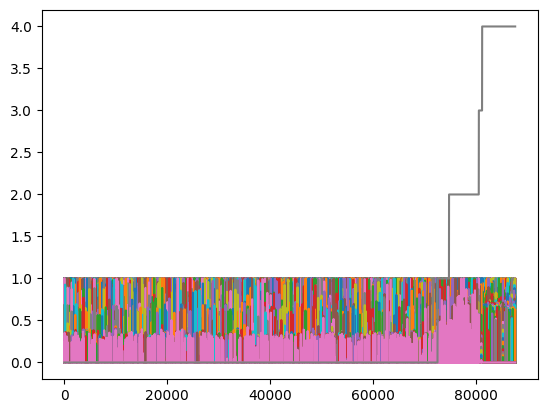

In [32]:
print(outliers.shape)
outliers.iloc[:,:].plot().legend().set_visible(False)

Interquartile Range (IQR)

In [ ]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

outliers_bool = (df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))

outliers_count_per_column = outliers_bool.sum()
count = 0
for i in range(len(outliers_count_per_column)):
    if outliers_count_per_column.iloc[i] > 0:
        count+=1
        print(outliers_count_per_column.iloc[i])
print(f"No. of Columns with ouliers: {count}")

In [ ]:
rows_with_outliers = outliers_bool.any(axis=1)
outliers_2 = df_train[rows_with_outliers]
outliers_2


In [35]:
outliers_2.describe()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,...,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000,84524.000000
mean,0.886521,0.755920,0.422927,0.218247,0.201067,0.210711,0.206046,0.201934,0.198723,0.196675,...,0.005205,0.004794,0.004445,0.004086,0.003813,0.003596,0.003337,0.003050,0.002908,0.490346
std,0.244307,0.223424,0.227269,0.207865,0.178248,0.173039,0.179661,0.178370,0.172699,0.169130,...,0.044928,0.042827,0.041237,0.039330,0.037847,0.036893,0.035402,0.033444,0.032486,1.159913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.917647,0.681010,0.250000,0.047478,0.081967,0.088469,0.073520,0.066098,0.064935,0.068692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.988372,0.824268,0.427586,0.163212,0.146943,0.157638,0.144144,0.143165,0.148472,0.147287,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.909259,0.575843,0.340332,0.257514,0.287137,0.298314,0.295547,0.290881,0.283433,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [111]:
#outliers_2.plot().legend().set_visible(False)

The df_train is labeled because the last column of dftrain has 5 unique values

## Apply Supervised learning

### MIT_BIH

In [36]:
df_train.shape, df1.shape

((87553, 188), (87553, 188))

In [83]:
X1  = df1.iloc[:,:-1]
y1 = df1.iloc[:,-1]

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)



### PCA

In [85]:
from sklearn.decomposition import PCA

In [86]:
X_train_pca = PCA(n_components=2).fit_transform(X_train)
X_test_pca = PCA(n_components=2).fit_transform(X_test)


In [87]:
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score,confusion_matrix, classification_report



In [89]:
logisReg = LogisticRegression(solver='liblinear',max_iter=100, random_state=0)

In [90]:
logisReg.fit(X_train_pca, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [91]:
y_pred=logisReg.predict(X_test_pca)

In [92]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
confusion_mat

Accuracy: 0.8238821312317972


array([[14427,     0,     0,     0,   150],
       [  418,     0,     0,     0,     0],
       [ 1120,     0,     0,     0,     0],
       [  152,     0,     0,     0,     0],
       [ 1244,     0,     0,     0,     0]], dtype=int64)

In [93]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90     14577
         1.0       0.00      0.00      0.00       418
         2.0       0.00      0.00      0.00      1120
         3.0       0.00      0.00      0.00       152
         4.0       0.00      0.00      0.00      1244

    accuracy                           0.82     17511
   macro avg       0.17      0.20      0.18     17511
weighted avg       0.69      0.82      0.75     17511



m:\SOL\ML_intern_task\VENV_for_ECG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
m:\SOL\ML_intern_task\VENV_for_ECG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
m:\SOL\ML_intern_task\VENV_for_ECG\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

### RandomSearchCV

In [94]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:

# Defining the parameter grid for RandomizedSearchCV
param_grid = {
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Add other solvers if appropriate for your dataset
    'C': np.logspace(-4, 4, 20),  # Regularization strengths
    'penalty': ['l2'],  # Adjust based on solver compatibility
}

# Setting up RandomizedSearchCV
random_search = RandomizedSearchCV(logisReg, param_distributions=param_grid, n_iter=60, cv=5, 
                                   verbose=2, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(X_train, y_train)

# Best parameters found by RandomizedSearchCV
print("Best Parameters: ", random_search.best_params_)

# Predicting with the best estimator
y_pred = random_search.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f'Classification Report:\n{class_report}')


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'solver': 'saga', 'penalty': 'l2', 'C': 78.47599703514607}
Accuracy: 0.915881445948261
Confusion Matrix:
[[14309    31   202     7    28]
 [  209   187    21     0     1]
 [  701     4   385    14    16]
 [  102     0    11    39     0]
 [  112     1    13     0  1118]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.84      0.45      0.58       418
         2.0       0.61      0.34      0.44      1120
         3.0       0.65      0.26      0.37       152
         4.0       0.96      0.90      0.93      1244

    accuracy                           0.92     17511
   macro avg       0.80      0.59      0.65     17511
weighted avg       0.90      0.92      0.91     17511



m:\SOL\ML_intern_task\VENV_for_ECG\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Grid Search CV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
# Defining the parameter grid for GridSearchCV
param_grid = {
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Consider solver compatibility with penalty
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l2'],  # L2 is used by the solvers mentioned
}

# Setting up GridSearchCV
grid_search = GridSearchCV(logisReg, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Using the best estimator found to make predictions
y_pred = grid_search.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")
print(f'Classification Report:\n{class_report}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.9159956598709382
Confusion Matrix:
[[14304    31   206     7    29]
 [  208   187    22     0     1]
 [  696     5   388    15    16]
 [   95     0    11    46     0]
 [  113     3    13     0  1115]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95     14577
         1.0       0.83      0.45      0.58       418
         2.0       0.61      0.35      0.44      1120
         3.0       0.68      0.30      0.42       152
         4.0       0.96      0.90      0.93      1244

    accuracy                           0.92     17511
   macro avg       0.80      0.59      0.66     17511
weighted avg       0.91      0.92      0.91     17511



#### SGD classifier

In [40]:
from sklearn.linear_model import SGDClassifier

In [97]:
from sklearn import preprocessing

In [ ]:
model_SGD = SGDClassifier()